<a href="https://colab.research.google.com/github/Manjirii07/FS_ManjiriLalge/blob/main/PRODIGY_ML_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --quiet

import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/datasets/archive (1).zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# STEP 2: Set Dataset Path
# Replace with your extracted folder path
dataset_path = "/content/leapGestRecog"  # check this path after unzip

# Data Augmentation and Splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
# STEP 3: Build CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,354 (12.61 MB)

 Trainable params: 3,305,354 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# STEP 4: Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 588s 1s/step - accuracy: 0.7162 - loss: 0.8107 - val_accuracy: 0.8447 - val_loss: 0.5496
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 584s 1s/step - accuracy: 0.9825 - loss: 0.0410 - val_accuracy: 0.8425 - val_loss: 0.8689
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.9850 - loss: 0.0292 - val_accuracy: 0.9165 - val_loss: 0.3943
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 0.9859 - loss: 0.0298 - val_accuracy: 0.8915 - val_loss: 0.4585
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 545s 1s/step - accuracy: 0.9880 - loss: 0.0209 - val_accuracy: 0.9072 - val_loss: 0.8453
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.9887 - loss: 0.0227 - val_accuracy: 0.8932 - val_loss: 0.9646
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.9915 - loss: 0.0176 - val_accuracy: 0.8988 - val_loss: 0.7657
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.9893 - loss: 0.0195 - val_accu

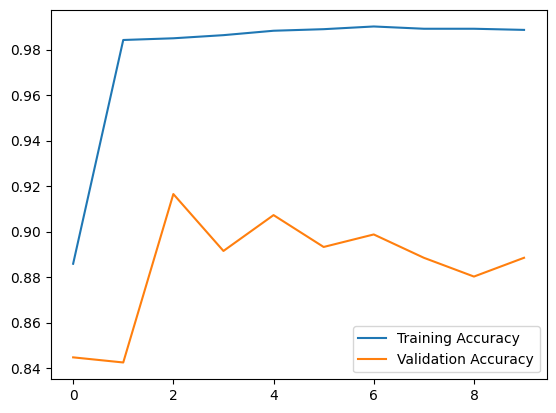

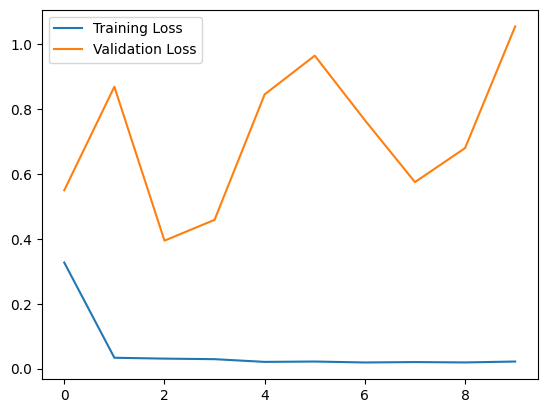

In [ ]:
# STEP 5: Plot Accuracy & Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step
              precision    recall  f1-score   support

          00       0.10      0.10      0.10       400
          01       0.10      0.10      0.10       400
          02       0.11      0.11      0.11       400
          03       0.13      0.13      0.13       400
          04       0.10      0.08      0.09       400
          05       0.09      0.09      0.09       400
          06       0.09      0.12      0.11       400
          07       0.09      0.10      0.10       400
          08       0.12      0.02      0.03       400
          09       0.09      0.15      0.12       400

    accuracy                           0.10      4000
   macro avg       0.10      0.10      0.10      4000
weighted avg       0.10      0.10      0.10      4000



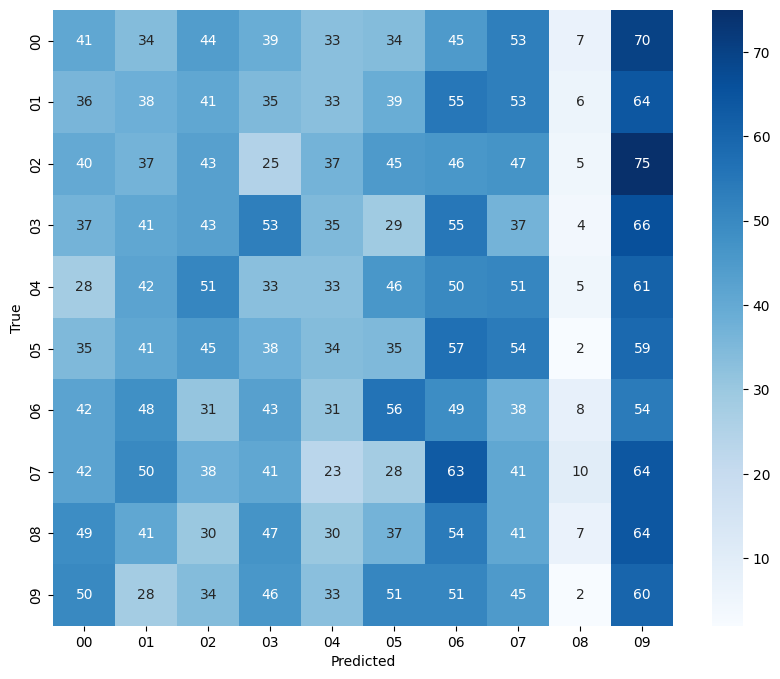

In [ ]:
# STEP 6: Evaluate Model
val_preds = model.predict(val_data)
y_true = val_data.classes
y_pred = np.argmax(val_preds, axis=1)

print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_data.class_indices.keys(),
            yticklabels=val_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# STEP 7: Test on Custom Image
from google.colab import files
uploaded = files.upload()

for fname in uploaded.keys():
    img = load_img(fname, target_size=(128,128), color_mode="grayscale")
    img_array = img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_data.class_indices.keys())[class_idx]

    print(f"🖐 Predicted Gesture: {class_label}")


Saving frame_01_03_0005.png to frame_01_03_0005.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
🖐 Predicted Gesture: 01
